![example](images/director_shot.jpeg)

# Movie Industry Analysis

**Authors:** Vince Scacco
***

## Overview

Movies are in abundance in today's day and age. With such an abundance shows that they are high in demand, and have become a lucrative and competitive space to work in. This analysis helps to provide some insights on how many plays an impact on movie performance, and whether it actually matters as a factor when creating a movie. The results in this analysis show that there could be a relationship between increasing your production budget and having a higher gross profit and that the more money you see going in and out, the more popular a film becomes. Results also show that the amount of money spent in movies hasn't really changed over-time. 

## Business Problem

This analysis aims to show readers how money plays apart in a movie's bottom line and popularity and whether you do need a substantial amount of money to create a 'good' film. 

***
Questions to consider:
* Does a business need to consider production budgets used on other movies in the past?
* Does the production budget affect a movie's gross profit?
* Does a production budget affect a movie's popularity?
***

## Data Understanding

The data used for this study was already prepared by Acamedy XI and given in a zippedfile. This file contains multiple csv files that can be used for analysis, only 3 were chosen; 

* n.movie_budgets.csv.gz
* tmdb.movies.csv.gz
* rt.movie_info.tsv.gz
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy.stats import linregress
import matplotlib.dates as mdates

%matplotlib inline
sns.set_theme(style="whitegrid")

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***

In [2]:
# First data set will come from tn.movie_budgets.csv.gz
#As the title of the data suggests, this data set will be titled movie_budgets
df_movie_budgets=pd.read_csv('tn.movie_budgets.csv.gz')
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#breaking down the dataframe as well
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Tn Movie Budgets table consists of release date, movie name, budget, the gross profit brought in and gross profit worldwide 

There are no misssing numberss, no changes need to be made for now. 

In [4]:
#I want to check the relevancy of the data in terms of dates, I'll check how far the year goes back 
min_value = df_movie_budgets['release_date'].min()
max_value = df_movie_budgets['release_date'].max()
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")

Minimum Value: Apr 1, 1975
Maximum Value: Sep 9, 2016


This shows me that the range of the data in terms of years spans from 1975 to 2016. 

However now production_budget, domestic_grosss and worldwide_gross need to be converted to numeric, so they can be used numerically 

In [5]:
df_movie_budgets['production_budget'] = pd.to_numeric(df_movie_budgets['production_budget'].replace('[\$,]', '', regex=True), errors='coerce')
df_movie_budgets['domestic_gross'] = pd.to_numeric(df_movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True), errors='coerce')
df_movie_budgets['worldwide_gross'] = pd.to_numeric(df_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True), errors='coerce')
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [6]:
#moving onto the second data set tmdb.movies.csv.gz
df_tmbd_movies=pd.read_csv('tmdb.movies.csv.gz')
df_tmbd_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
#breakdown of data
df_tmbd_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


This data shows genre, language, title,	popularity,	release date	title, vote average and vote count.

There are no misssing values in this data, and I will leave the data types as is for now, as they are all in their relevant state 

In [8]:
#I'm also wanting to check the relevancy of this data and how close it matches to the other dataset
min_value = df_tmbd_movies['release_date'].min()
max_value = df_tmbd_movies['release_date'].max()
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")

Minimum Value: 1930-04-29
Maximum Value: 2020-12-25


This data has a larger range then the last set, ranging from 1930 to 2020

In [9]:
#Now I'll run one more data set, this project will consist of 3 datatypes for me to work from 
df_rt_movie=pd.read_csv('rt.movie_info.tsv.gz', sep='\t', compression='gzip')
df_rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [10]:
df_rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [11]:
#For the purpose of this project, it's within my best interest to remove missing data, I don't need studio, box office or currency datas as it's irrelevant to this study 
df_rt_movie_cleaned = df_rt_movie.drop(['studio', 'box_office', 'currency', 'writer'], axis=1).dropna(subset=['genre', 'runtime'])
df_rt_movie_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1526 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1526 non-null   int64 
 1   synopsis      1482 non-null   object
 2   rating        1526 non-null   object
 3   genre         1526 non-null   object
 4   director      1344 non-null   object
 5   theater_date  1194 non-null   object
 6   dvd_date      1194 non-null   object
 7   runtime       1526 non-null   object
dtypes: int64(1), object(7)
memory usage: 107.3+ KB


In [12]:
#wanting to make sure I can use runtime as a figure 
df_rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [13]:
#runtime needs to be converted to an integer to perform analysis with 
df_rt_movie_cleaned['runtime'] = pd.to_numeric(df_rt_movie_cleaned['runtime'].str.extract('(\d+)', expand=False), errors='coerce')
df_rt_movie_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1526 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1526 non-null   int64 
 1   synopsis      1482 non-null   object
 2   rating        1526 non-null   object
 3   genre         1526 non-null   object
 4   director      1344 non-null   object
 5   theater_date  1194 non-null   object
 6   dvd_date      1194 non-null   object
 7   runtime       1526 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 107.3+ KB


This data will now contain what I want from genre and runtime, without any missing values between the 2 so I can make an analysis on the variables.


# Creating my Master Dataframe

In [14]:
#First, visualise the tables and make adjustments accordingly
df_rt_movie_cleaned.head()

,id,synopsis,rating,genre,director,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,"Oct 9, 1971","Sep 25, 2001",104
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013",108
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,"Dec 9, 1994","Aug 27, 1997",128
4,7,NaN,NR,Drama|Romance,Rodney Bennett,NaN,NaN,200


In [15]:
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [16]:
df_tmbd_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


It's clear looking at the tables df_rt_movie_cleaned can't be used with the other tables as there's nothing to merge. 

However we can merge the other 2 tables together by title, and do an analysis of this data from there. The column "movie" in df_movie_budgets will need to be changed to "title"


In [17]:
#making the tables have a primary key
df_movie_budgets = df_movie_budgets.rename(columns={'movie': 'title'})
#from here, I'll use the release date as the secondary key, converting them both to the same format
df_movie_budgets['release_date'] = pd.to_datetime(df_movie_budgets['release_date']).dt.strftime('%Y-%m-%d')
df_tmbd_movies['release_date'] = pd.to_datetime(df_tmbd_movies['release_date']).dt.strftime('%Y-%m-%d')
df_tmbd_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [18]:
df_movie_budgets.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [19]:
#merging process, defined below 
merged_df = pd.merge(df_movie_budgets, df_tmbd_movies, on=['title', 'release_date'], how='left')
merged_df.head()

,id_x,release_date,title,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,vote_average,vote_count
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,6.0,"[28, 12, 14, 878]",19995.0,en,Avatar,26.526,7.4,18676.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2470.0,"[12, 28, 14]",1865.0,en,Pirates of the Caribbean: On Stranger Tides,30.579,6.4,8571.0
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,14169.0,"[28, 12, 878]",99861.0,en,Avengers: Age of Ultron,44.383,7.3,13457.0
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#vote_average, vote_count and popularity can be used as apart of the analysis
merged_df_cleaned=merged_df.dropna(subset=['popularity'])
merged_df_cleaned

,id_x,release_date,title,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,vote_average,vote_count
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,6.0,"[28, 12, 14, 878]",19995.0,en,Avatar,26.526,7.4,18676.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2470.0,"[12, 28, 14]",1865.0,en,Pirates of the Caribbean: On Stranger Tides,30.579,6.4,8571.0
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,14169.0,"[28, 12, 878]",99861.0,en,Avengers: Age of Ultron,44.383,7.3,13457.0
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,23811.0,"[12, 28, 14]",299536.0,en,Avengers: Infinity War,80.773,8.3,13948.0
8,9,2017-11-17,Justice League,300000000,229024295,655945209,20623.0,"[28, 12, 14, 878]",141052.0,en,Justice League,34.953,6.2,7510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5850,22,2014-02-14,Down and Dangerous,50000,0,0,11924.0,"[80, 53, 18]",164286.0,en,Down and Dangerous,2.621,4.3,9.0
5853,25,2015-09-01,"Run, Hide, Die",50000,0,0,17277.0,"[53, 27]",290391.0,en,"Run, Hide, Die",0.600,3.5,2.0
5866,38,2016-03-18,Krisha,30000,144822,144822,14760.0,[18],323929.0,en,Krisha,5.288,6.8,86.0
5867,38,2016-03-18,Krisha,30000,144822,144822,18030.0,[18],323929.0,en,Krisha,5.288,6.8,86.0


There is now 1400 rows of data to be used, which can now be analysed with no 'nan' types. 

I'll quickly check below for any nan types in the table

In [21]:
#need to double check that type of release_date is an integer, if not needs to be converted. Could be left as an integer, just wanted to go the next step.
release_date_type = merged_df_cleaned['release_date']

print(f"Data type of 'release_date': {release_date_type}")


Data type of 'release_date': 0       2009-12-18
1       2011-05-20
3       2015-05-01
6       2018-04-27
8       2017-11-17
           ...    
5850    2014-02-14
5853    2015-09-01
5866    2016-03-18
5867    2016-03-18
5885    2013-01-04
Name: release_date, Length: 1400, dtype: object


In [22]:
#convert release_date to time
merged_df_cleaned.loc[:, 'release_date'] = pd.to_datetime(merged_df_cleaned['release_date'])


In [23]:
nan_values = merged_df_cleaned.isna().any().any()

if nan_values:
    print("The DataFrame has NaN values.")
    # If you want to know the columns with NaN values, you can use:
    columns_with_nan = merged_df_cleaned.columns[df.isna().any()].tolist()
    print("Columns with NaN values:", columns_with_nan)
else:
    print("The DataFrame does not have any NaN values.")

The DataFrame does not have any NaN values.


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***

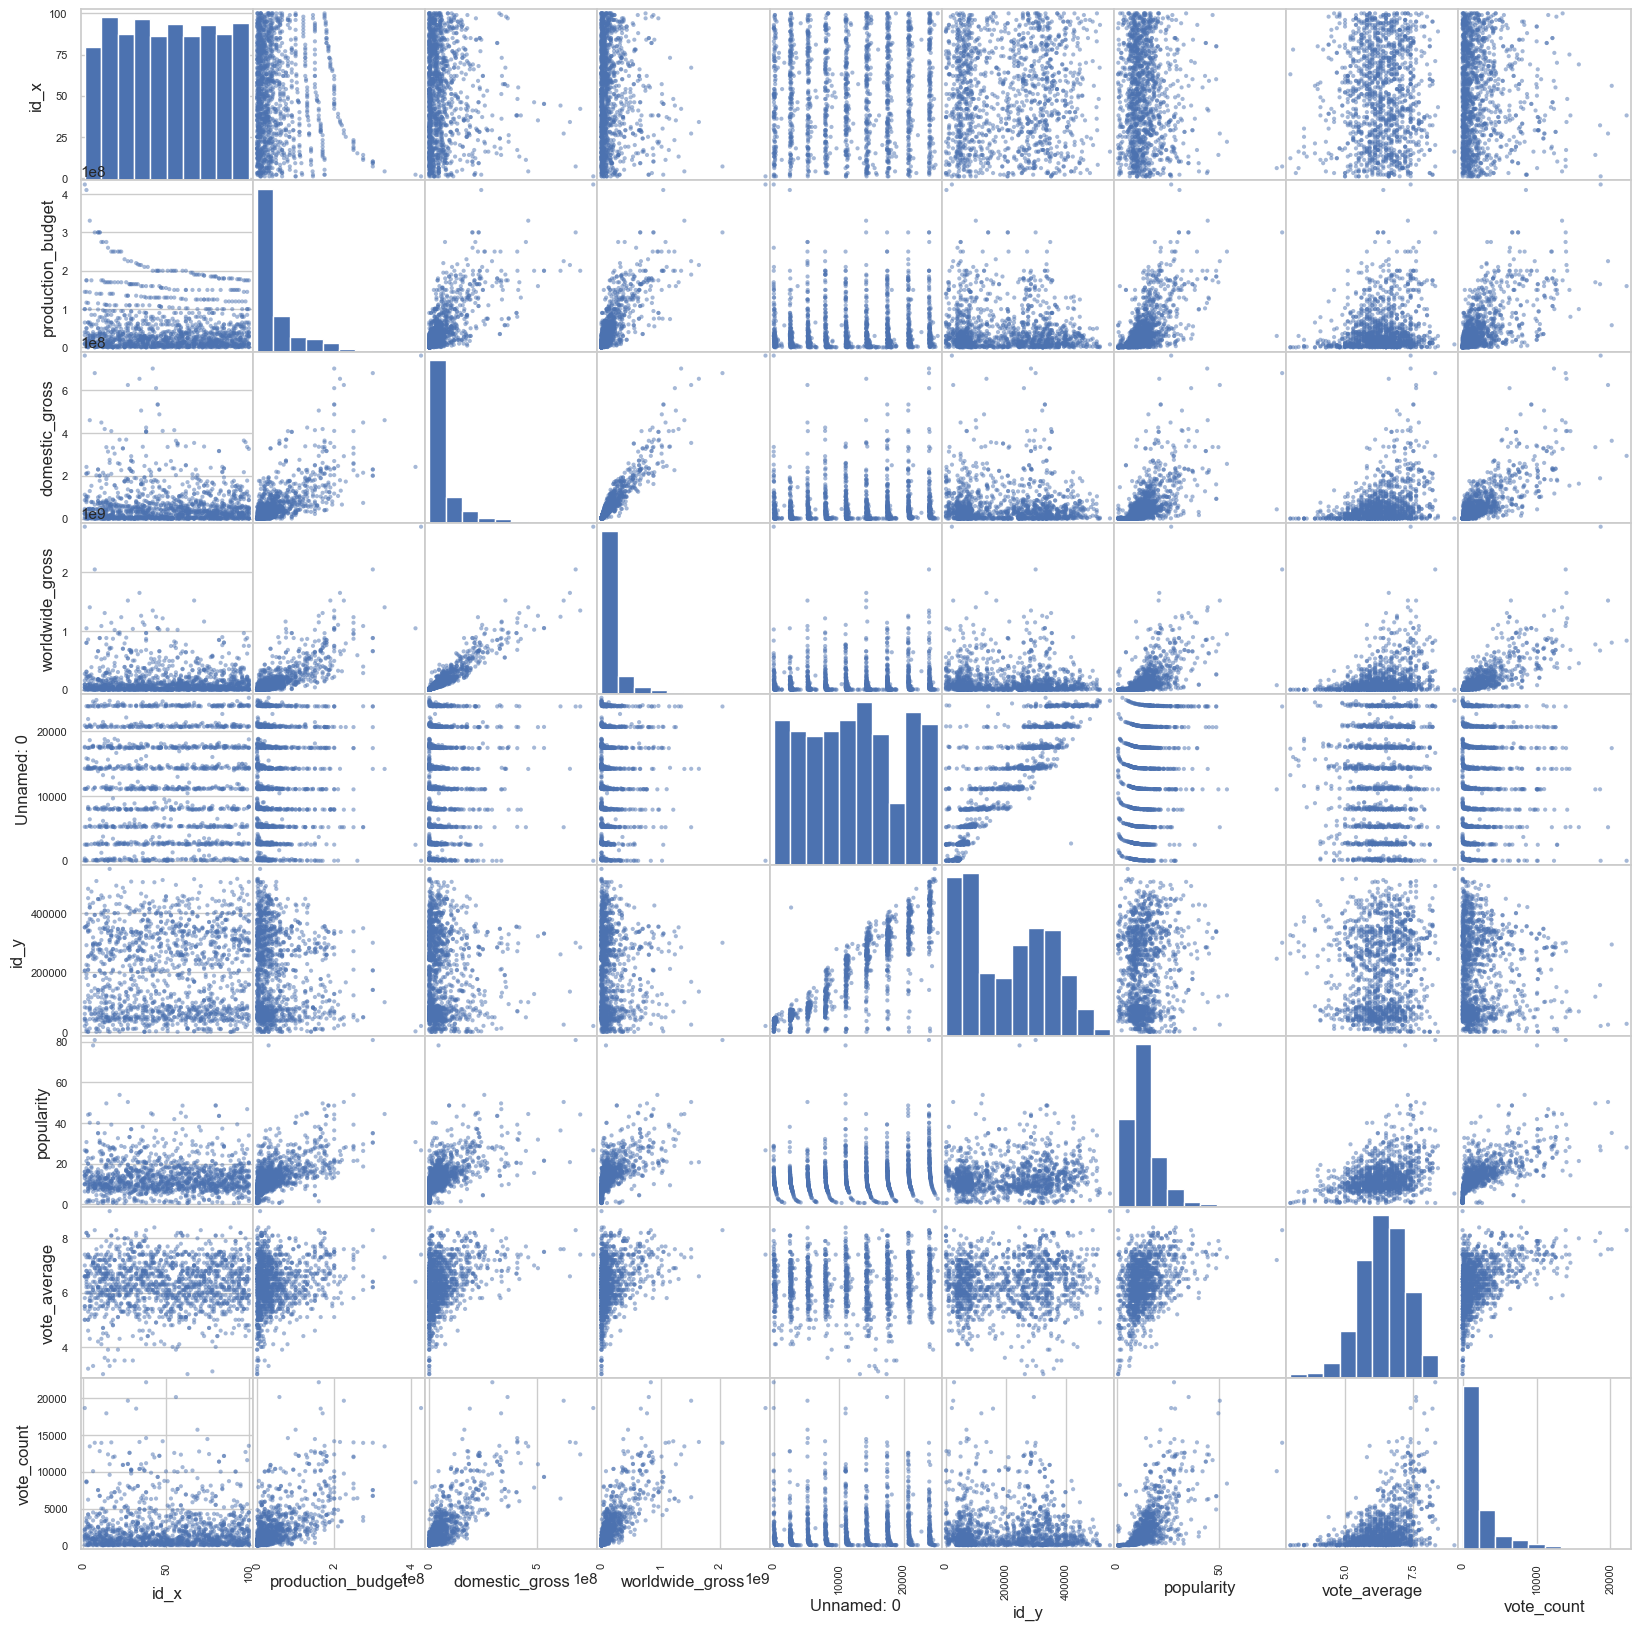

In [24]:
#An overview of the data created 
scatter_matrix(merged_df_cleaned, alpha=0.5, figsize=(20, 20), diagonal='hist')

# Show the plot
plt.show()

I did this to do a general overview of what I need. I've determined just from looking at this and the variables in the data I'm only going to use scatterplots. All the data is random and not interconnected, which means that it's not progressive and not categoric, so a line plot and a histogram is not useful here.

I'm going to mainly look at how all production_budget data interacts with it's other variables. 

In [25]:
#Let's analyse production_budget and how it's been affected over the course of the years

In [26]:
#I'm curious to see what the data range is in years 
min_value_cleaned = merged_df_cleaned['release_date'].min()
max_value_cleaned = merged_df_cleaned['release_date'].max()
print(f"Minimum Value: {min_value_cleaned}")
print(f"Maximum Value: {max_value_cleaned}")

Minimum Value: 1977-11-16 00:00:00
Maximum Value: 2019-05-03 00:00:00


In [27]:
#Let's also check the production budget, then map it 
min_value_cleaned_budget = merged_df_cleaned['production_budget'].min()
max_value_cleaned_budget = merged_df_cleaned['production_budget'].max()
print(f"Minimum Value: {min_value_cleaned_budget}")
print(f"Maximum Value: {max_value_cleaned_budget}")


Minimum Value: 20000
Maximum Value: 425000000


Slope: 3450.327768514347
Intercept: -10211301.027131252
R-squared value: 0.003073304370272229
P-value: 0.04086718979785132
Standard Error: 1685.6967562795694


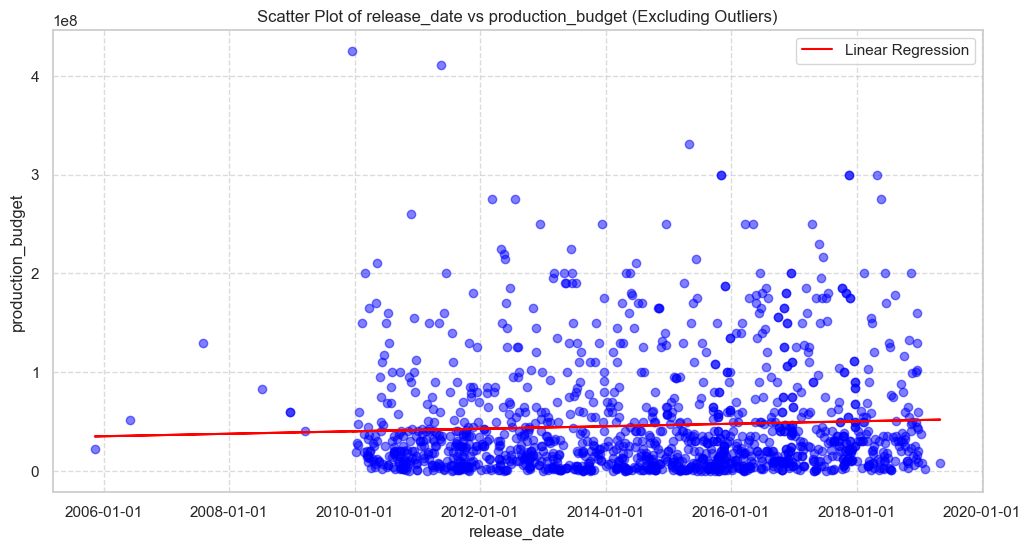

In [28]:

#The use of the scatterplot with regression analysis will probably be used multiple times. Best to define as a function, this will make it consistent.
def plot_scatter_with_regression_timestamp(data_frame, x_col, y_col, iqr_multiplier=1.5, alpha=0.5, figsize=(12, 6)):
    # Calculate IQR
    Q1 = data_frame[x_col].quantile(0.25)
    Q3 = data_frame[x_col].quantile(0.75)
    IQR = Q3 - Q1

    #I'm considering outliers in this function and wanting to exclude them
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR

    #This line excludes outliers if any
    filtered_df = data_frame[(data_frame[x_col] >= lower_bound) & (data_frame[x_col] <= upper_bound)]

   
    plt.figure(figsize=figsize)
    plt.scatter(filtered_df[x_col], filtered_df[y_col], alpha=alpha, marker='o', color='blue')

    #Release date needs to be considered as a timestamp
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot of {x_col} vs {y_col} (Excluding Outliers)')

    #I wanted the regression statistics to be shown
    slope, intercept, r_value, p_value, std_err = linregress(mdates.date2num(filtered_df[x_col]), filtered_df[y_col])
    line = slope * mdates.date2num(filtered_df[x_col]) + intercept
    plt.plot(filtered_df[x_col], line, color='red', label='Linear Regression')

    
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-squared value: {r_value**2}")
    print(f"P-value: {p_value}")
    print(f"Standard Error: {std_err}")

    
    plt.legend()

    
    plt.grid(True, linestyle='--', alpha=0.7)

  
    plt.show()

#Function in use
plot_scatter_with_regression_timestamp(merged_df_cleaned, 'release_date', 'production_budget')

There's no relationship according to this scatterplot in relation to production budget change over the years. Time has not affected production budget put into movies. A p value of 0.04 suggests that this result has significance.

Slope for domestic_gross: 0.6367066419038031
Intercept for domestic_gross: 11732874.186206315
R-squared value for domestic_gross: 0.3688017385327644
P-value for domestic_gross: 9.36518404810702e-129
Standard Error for domestic_gross: 0.02340116560545591


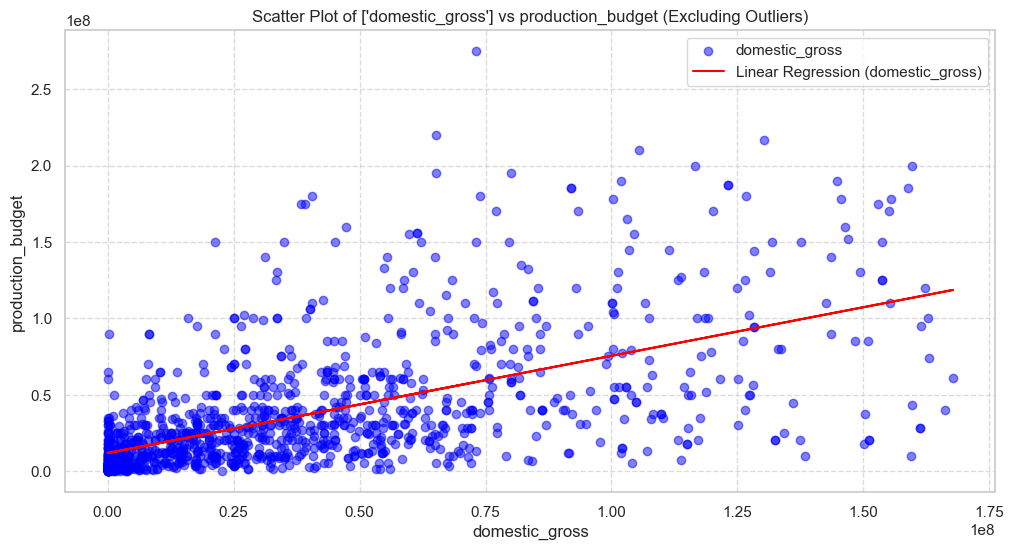

In [29]:
#Now to check production budget and it's relationship with domestic gross, however have to define a function with numeric values as release_date was calculated as a timestamp 
#To not: there I allowed for multiple x axis in this function for future use.
def plot_scatter_with_regression_numeric(data_frame, x_cols, y_col, iqr_multiplier=1.5, alpha=0.5, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    colors = ['blue', 'green', 'orange', 'purple', 'cyan'] #this is a random set of colours
    
    for i, x_col in enumerate(x_cols):
        # Calculate IQR
        Q1 = data_frame[x_col].quantile(0.25)
        Q3 = data_frame[x_col].quantile(0.75)
        IQR = Q3 - Q1

        #I'm considering outliers in this function and wanting to exclude them
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        # This is the line to exclude outliers
        filtered_df = data_frame[(data_frame[x_col] >= lower_bound) & (data_frame[x_col] <= upper_bound)]

    
        plt.scatter(filtered_df[x_col], filtered_df[y_col], alpha=alpha, marker='o', label=f'{x_col}', color=colors[i])

   
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f'Scatter Plot of {x_cols} vs {y_col} (Excluding Outliers)')

        # I wanted to see the regression statistics
        slope, intercept, r_value, p_value, std_err = linregress(filtered_df[x_col], filtered_df[y_col])
        line = slope * filtered_df[x_col] + intercept
        plt.plot(filtered_df[x_col], line, label=f'Linear Regression ({x_col})', color=['red', 'black'][i])

        
        print(f"Slope for {x_col}: {slope}")
        print(f"Intercept for {x_col}: {intercept}")
        print(f"R-squared value for {x_col}: {r_value**2}")
        print(f"P-value for {x_col}: {p_value}")
        print(f"Standard Error for {x_col}: {std_err}")


    plt.legend()

 
    plt.grid(True, linestyle='--', alpha=0.7)

   
    plt.show()


plot_scatter_with_regression_numeric(merged_df_cleaned, ['domestic_gross'], 'production_budget')

This data has a positive slope to suggest that there's a correlation with production_budget and domestic gross. A p-value of 9.36 can suggest non-significance.

Slope for domestic_gross: 8.641516435178911e-08
Intercept for domestic_gross: 8.884680192675125
R-squared value for domestic_gross: 0.2664156947565959
P-value for domestic_gross: 2.5080928941967886e-87
Standard Error for domestic_gross: 4.028531515197711e-09
Slope for production_budget: 1.0307289691113346e-07
Intercept for production_budget: 8.862421010842882
R-squared value for production_budget: 0.2488249900515701
P-value for production_budget: 5.579553732904165e-81
Standard Error for production_budget: 5.025348558178138e-09


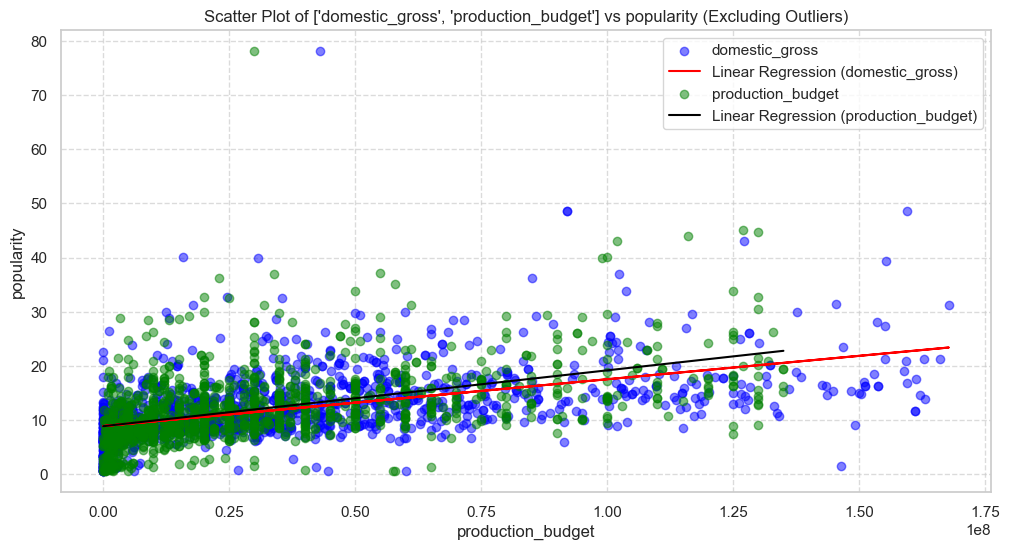

In [30]:
#One more thing to check, how do the independent variables affect popularity? 
#Let's check for a relationship, it's better to just plot a line graph with multiple lines going through it to see any correlations. 
plot_scatter_with_regression_numeric(merged_df_cleaned, ['domestic_gross', 'production_budget'], 'popularity')

Domestic gross and production budget are both numerical factors that can affect the popularity of a movie. This data suggests a positive correlation, however both p-values suggest non-significance. 

## Evaluation
Results of this analysis show that while there may be positive correlation and r-squared values in the data, that the explanatory variable may not be responsible for that; 

* This means that while a higher production budget shows a higher domestic gross, it may not be explained by a higher production budget.
* This means that while the production budget and gross budget figures are higher and show a higher popularity score, it may not be explained by a higher domestic production budget and higher domestic gross. 

Exlcuding outliers, the graph shows that between 2006 and 2020, there's no relationship between production budget increasing or decreasing. This is to say that overtime, production budgets more or less operated on their own and used other factors to set their budget. 

The population size of this data is 1400, coming from a merged data table of over 5000 rows. There's a certain degree of doubt in this analysis to generalize beyond the data as the sources this data came from are different. It's clear that the source that contains the data for popularity was quite small. This data is also missing a source, as the third data source was unusable as it could not be merged (none of the keys were similar). 

This data is a good baseline for someone to use at their discretion if they'd like to determine if they need more money to make a good movie. This analysis' consensus would be that money does not matter.



## Conclusions
The work done has been insightful in terms of what not to do when creating a movie. You can stick to a similar production budget to these movies and it would not be the main factor of the performance of the movie. 

There are always other factors to consider when creating a movie and judging it's performance. This study takes an objective look at how money should be sent. 

This analysis would not be able to fully solve the problem as the data is not large enough and is not specific enough. It's a random list of movies where the analyst has assumed that they are random and have no significance. This data could have come from a list of unknown movies or popular movies, however this is not clear. 

It would be suggested to look at movies that have performed well (maybe a ranking) and analyse the data from those movies and see how money movement worked for them. 

***